## Constant bidding strategy 1: range of bid prices

In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

#Import validation and testing data sets
rtb_train = pd.read_csv("train.csv")
rtb_train_cropped = rtb_train[['payprice','click','bidprice']]
rtb_validation = pd.read_csv("validation.csv")
rtb_validation_cropped = rtb_validation[['payprice','click']]

In [46]:
maxPrice = (rtb_train_cropped.loc[:,"payprice"].max())
minPrice = (rtb_train_cropped.loc[:,"payprice"].min())
maxBid = (rtb_train_cropped.loc[:,"bidprice"].max())
minBid = (rtb_train_cropped.loc[:,"bidprice"].min())
bidPrice = (rtb_train_cropped.loc[:,"bidprice"].mean())
bidPrice2 = (rtb_train_cropped.loc[:,"payprice"].mean())

constantPrice = 0
bidPriceList = []
count = 0
while (count < ((maxPrice-minPrice)/10)):
    constantPrice +=10
    bidPriceList.append(constantPrice)
    count = count +1
    
numberBids = []
wonBids = []
CTR = [] 
numberClicks = [] 
CPC = [] 
CPM = []
eCPC = []

for j in range (0,len(bidPriceList)):
    budget = 6250
    bids = 0
    impressions = 0
    clicks = 0
    for i in range(0,len(rtb_validation_cropped)):
        if budget > 0 and budget > (rtb_validation_cropped['payprice'].values[i]/1000):
            impressions += 1
            if (bidPriceList[j]/1000) > (rtb_validation_cropped['payprice'].values[i]/1000):
                bids += 1
                clicks += rtb_validation_cropped['click'].values[i]
                budget = budget - (rtb_validation_cropped['payprice'].values[i]/1000)
        else: 
            print("Budget is spent!")
            break
    ctr = (clicks/impressions)*100    
    cpm = 6250/impressions
    cpc = 6250/clicks
        #Output for the alrogithm
    print("Output")
    print(bidPriceList[j])
    numberBids.append(impressions)
    print(numberBids)
    wonBids.append(bids)
    print(wonBids)
    CTR.append(ctr)
    print(CTR)
    numberClicks.append(clicks)
    print(numberClicks)
    CPC.append(cpc)
    print(CPC)
    CPM.append(cpm)
    print(CPM)

Output
10
[303925]
[13708]
[0.0013161141729044995]
[4]
[1562.5]
[0.020564283951632803]
Output
20
[303925, 303925]
[13708, 33531]
[0.0013161141729044995, 0.003290285432261249]
[4, 10]
[1562.5, 625.0]
[0.020564283951632803, 0.020564283951632803]
Output
30
[303925, 303925, 303925]
[13708, 33531, 65084]
[0.0013161141729044995, 0.003290285432261249, 0.005922513778070248]
[4, 10, 18]
[1562.5, 625.0, 347.22222222222223]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
40
[303925, 303925, 303925, 303925]
[13708, 33531, 65084, 85541]
[0.0013161141729044995, 0.003290285432261249, 0.005922513778070248, 0.00888377066710537]
[4, 10, 18, 27]
[1562.5, 625.0, 347.22222222222223, 231.4814814814815]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
50
[303925, 303925, 303925, 303925, 303925]
[13708, 33531, 65084, 85541, 101750]
[0.0013161141729044995, 0.003290285432261249, 0.005922513778070248, 0.00888377066710537, 0.0121740560993666

Budget is spent!
Output
150
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 228415, 180645, 168873, 155789, 146684, 138657, 132755, 124300]
[13708, 33531, 65084, 85541, 101750, 138836, 153397, 145916, 131020, 126821, 121677, 117734, 114030, 111157, 106791]
[0.0013161141729044995, 0.003290285432261249, 0.005922513778070248, 0.00888377066710537, 0.01217405609936662, 0.016122398618080118, 0.019083655507115244, 0.029770374099774535, 0.03708931882974895, 0.037306141301451386, 0.03658794908498032, 0.038859043931171774, 0.04110863497695753, 0.043689503220217696, 0.04424778761061947]
[4, 10, 18, 27, 37, 49, 58, 68, 67, 63, 57, 57, 57, 58, 55]
[1562.5, 625.0, 347.22222222222223, 231.4814814814815, 168.9189189189189, 127.55102040816327, 107.75862068965517, 91.91176470588235, 93.28358208955224, 99.2063492063492, 109.64912280701755, 109.64912280701755, 109.64912280701755, 107.75862068965517, 113.63636363636364]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283

Budget is spent!
Output
210
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 228415, 180645, 168873, 155789, 146684, 138657, 132755, 124300, 118274, 109825, 105796, 101464, 98622, 94254]
[13708, 33531, 65084, 85541, 101750, 138836, 153397, 145916, 131020, 126821, 121677, 117734, 114030, 111157, 106791, 103579, 98872, 96555, 94010, 92306, 89564]
[0.0013161141729044995, 0.003290285432261249, 0.005922513778070248, 0.00888377066710537, 0.01217405609936662, 0.016122398618080118, 0.019083655507115244, 0.029770374099774535, 0.03708931882974895, 0.037306141301451386, 0.03658794908498032, 0.038859043931171774, 0.04110863497695753, 0.043689503220217696, 0.04424778761061947, 0.048193178551499065, 0.05281129068973367, 0.05576770388294453, 0.058148702988252, 0.0598243799557908, 0.06047488700744796]
[4, 10, 18, 27, 37, 49, 58, 68, 67, 63, 57, 57, 57, 58, 55, 57, 58, 59, 59, 59, 57]
[1562.5, 625.0, 347.22222222222223, 231.4814814814815, 168.9189189189189, 127.55102040816327, 107.7586206896551

Budget is spent!
Output
260
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 228415, 180645, 168873, 155789, 146684, 138657, 132755, 124300, 118274, 109825, 105796, 101464, 98622, 94254, 90991, 87765, 86550, 85064, 83763]
[13708, 33531, 65084, 85541, 101750, 138836, 153397, 145916, 131020, 126821, 121677, 117734, 114030, 111157, 106791, 103579, 98872, 96555, 94010, 92306, 89564, 87451, 85341, 84539, 83522, 82625]
[0.0013161141729044995, 0.003290285432261249, 0.005922513778070248, 0.00888377066710537, 0.01217405609936662, 0.016122398618080118, 0.019083655507115244, 0.029770374099774535, 0.03708931882974895, 0.037306141301451386, 0.03658794908498032, 0.038859043931171774, 0.04110863497695753, 0.043689503220217696, 0.04424778761061947, 0.048193178551499065, 0.05281129068973367, 0.05576770388294453, 0.058148702988252, 0.0598243799557908, 0.06047488700744796, 0.0615445483619259, 0.06038853757192503, 0.06123627960716349, 0.06348161384369416, 0.0644676050284732]
[4, 10, 18, 27, 37, 49

Budget is spent!
Output
300
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 228415, 180645, 168873, 155789, 146684, 138657, 132755, 124300, 118274, 109825, 105796, 101464, 98622, 94254, 90991, 87765, 86550, 85064, 83763, 82667, 81788, 80363, 79839]
[13708, 33531, 65084, 85541, 101750, 138836, 153397, 145916, 131020, 126821, 121677, 117734, 114030, 111157, 106791, 103579, 98872, 96555, 94010, 92306, 89564, 87451, 85341, 84539, 83522, 82625, 81844, 81214, 80182, 79803]
[0.0013161141729044995, 0.003290285432261249, 0.005922513778070248, 0.00888377066710537, 0.01217405609936662, 0.016122398618080118, 0.019083655507115244, 0.029770374099774535, 0.03708931882974895, 0.037306141301451386, 0.03658794908498032, 0.038859043931171774, 0.04110863497695753, 0.043689503220217696, 0.04424778761061947, 0.048193178551499065, 0.05281129068973367, 0.05576770388294453, 0.058148702988252, 0.0598243799557908, 0.06047488700744796, 0.0615445483619259, 0.06038853757192503, 0.06123627960716349, 0.06348

In [47]:
#Store summary statistics in a dataframe and plot graphs for each of them
summaryStatistics = pd.DataFrame({
    'bidPrice': bidPriceList,
    'numberBids': numberBids,
    'wonBids': wonBids,
    'CTR': CTR,
    'Clicks': numberClicks,
    'eCPC': CPC, 
    'CPM': CPM,
})
print(summaryStatistics)

         CPM       CTR  Clicks  bidPrice         eCPC  numberBids  wonBids
0   0.020564  0.001316       4        10  1562.500000      303925    13708
1   0.020564  0.003290      10        20   625.000000      303925    33531
2   0.020564  0.005923      18        30   347.222222      303925    65084
3   0.020564  0.008884      27        40   231.481481      303925    85541
4   0.020564  0.012174      37        50   168.918919      303925   101750
5   0.020564  0.016122      49        60   127.551020      303925   138836
6   0.020564  0.019084      58        70   107.758621      303925   153397
7   0.027362  0.029770      68        80    91.911765      228415   145916
8   0.034598  0.037089      67        90    93.283582      180645   131020
9   0.037010  0.037306      63       100    99.206349      168873   126821
10  0.040118  0.036588      57       110   109.649123      155789   121677
11  0.042609  0.038859      57       120   109.649123      146684   117734
12  0.045075  0.041109   

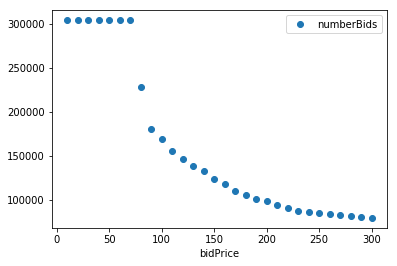

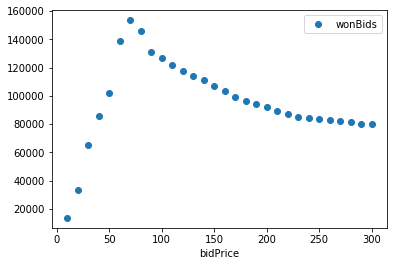

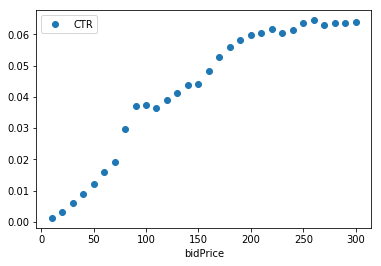

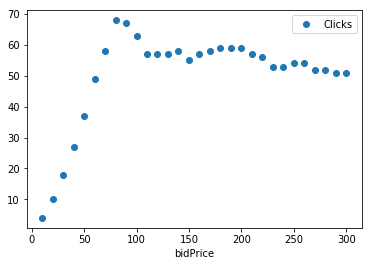

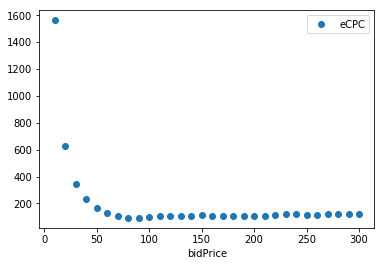

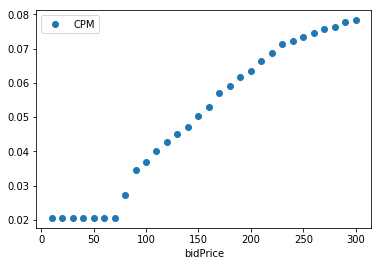

In [52]:
summaryStatistics.plot(x='bidPrice', y='numberBids', style='o'); summaryStatistics.plot(x='bidPrice', y='wonBids', style='o')
summaryStatistics.plot(x='bidPrice', y='CTR', style='o')
summaryStatistics.plot(x='bidPrice', y='Clicks', style='o')
summaryStatistics.plot(x='bidPrice', y='eCPC', style='o')
summaryStatistics.plot(x='bidPrice', y='CPM', style='o')